Running:

```bash
voila app-voila.ipynb
```

Resources:

* [introduction to ipywidgets interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)
* [Widgets that depend on each other](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#Arguments-that-are-dependent-on-each-other)
* [voila github repo](https://github.com/voila-dashboards/voila)


In [15]:
import ipywidgets as widgets
from ipywidgets import interact
from plotnine import *

from siuba import _, filter, summarize
from siuba.data import mtcars



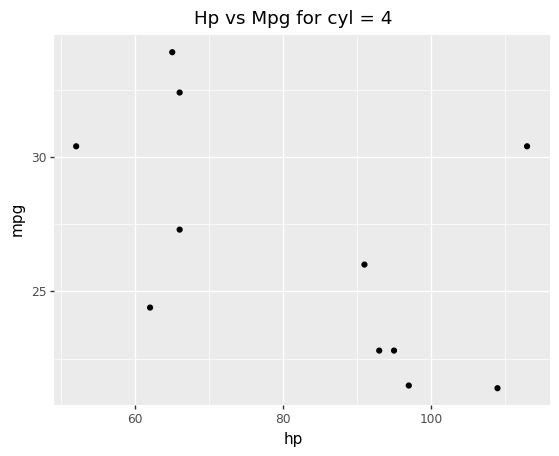

<ggplot: (312864183)>

In [13]:
p = (
    mtcars
    >> filter(_.cyl == 4)
    >> ggplot(aes("hp", "mpg"))
    + geom_point()
    + ggtitle("Hp vs Mpg for cyl = %s" % 4)
)

p

In [16]:

w = widgets.Dropdown(options=[4, 6, 8], value=4)

@interact(val_cyl=w)
def f(val_cyl):
    from plotly import tools
    p = (
        mtcars
        >> filter(_.cyl == val_cyl)
        >> ggplot(aes("hp", "mpg"))
        + geom_point()
        + ggtitle("Hp vs Mpg for cyl = %s" % val_cyl)
    )
    
    #return p
    return tools.mpl_to_plotly(p.draw())

interactive(children=(Dropdown(description='val_cyl', options=(4, 6, 8), value=4), Output()), _dom_classes=('w…